In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)
df = pd.read_csv('data.csv')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normal-loses         205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-door          205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [2]:
df = df.replace({'?': np.nan})
for col in list(df.columns):
    if ('NaN' in col):
        df[col] = df[col].astype(float)
df.head()

,symboling,normal-loses,make,fuel-type,aspiration,num-of-door,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,hihway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
gl_obj = df.select_dtypes(include=['int']).copy()
gl_obj.describe()

,symboling,curb-weight,engine-size,city-mpg,hihway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,2555.565854,126.907317,25.219512,30.751220
std,1.245307,520.680204,41.642693,6.542142,6.886443
min,-2.000000,1488.000000,61.000000,13.000000,16.000000
25%,0.000000,2145.000000,97.000000,19.000000,25.000000
50%,1.000000,2414.000000,120.000000,24.000000,30.000000
75%,2.000000,2935.000000,141.000000,30.000000,34.000000
max,3.000000,4066.000000,326.000000,49.000000,54.000000


In [4]:
gl_obj = df.select_dtypes(include=['object']).copy()
gl_obj.describe()

,normal-loses,make,fuel-type,aspiration,num-of-door,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,164,205,205,205,203,205,205,205,205,205,205,201,201,203,203,201
unique,51,22,2,2,2,5,3,2,7,7,8,38,36,59,23,186
top,161,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,7295
freq,11,32,185,168,114,96,120,202,148,159,94,23,20,19,37,2


In [5]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(df)

Your selected dataframe has 26 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
normal-loses,41,20.0
bore,4,2.0
stroke,4,2.0
price,4,2.0
num-of-door,2,1.0
horsepower,2,1.0
peak-rpm,2,1.0


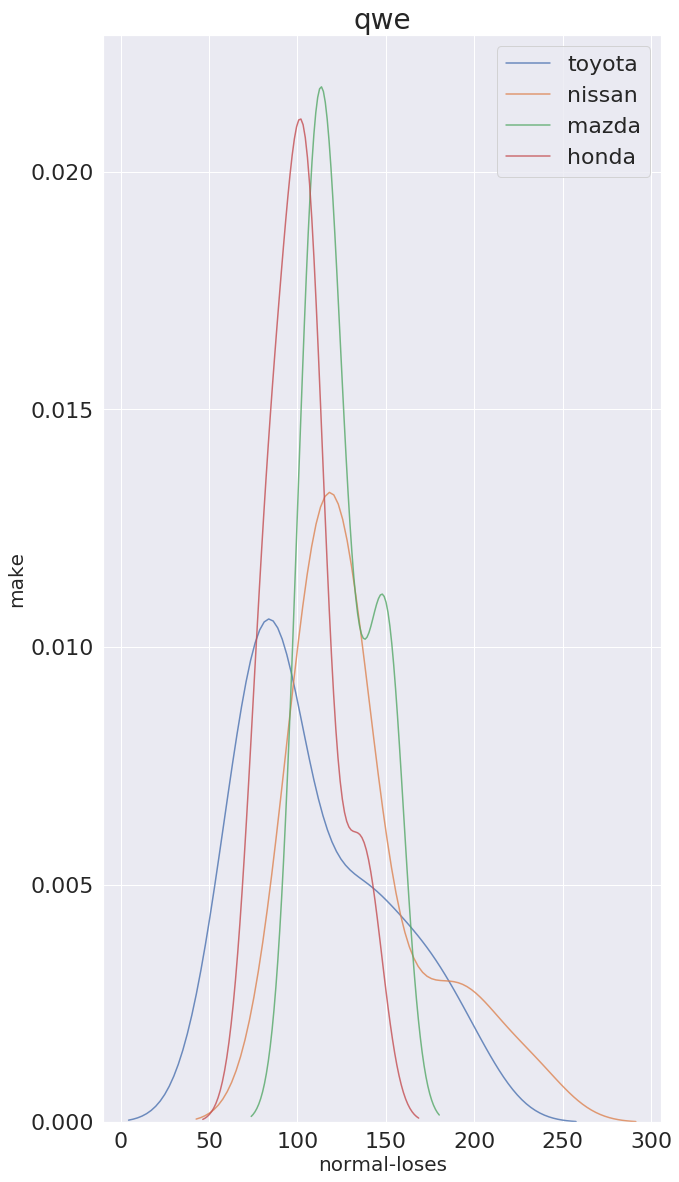

In [6]:
types = df.dropna(subset=['normal-loses'])
types = types['make'].value_counts()
types = list(types[types.values > 12].index)

figsize(10, 20)
for b_type in types:
    subset = df[df['make'] == b_type]
    sns.kdeplot(subset['normal-loses'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
plt.xlabel('normal-loses', size = 20);
plt.ylabel('make', size = 20); 
plt.title('qwe', size = 28);

In [7]:
df.corr(method='pearson', min_periods=1)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,hihway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
hihway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


In [8]:
numeric_subset = df.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'symboling':
        next
    else:
        numeric_subset['make_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['fuel_' + col] = np.log(numeric_subset[col])

categorical_subset = df[['make', 'fuel-type']]

categorical_subset = pd.get_dummies(categorical_subset)
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features = features.dropna(subset = ['symboling'])

correlations = features.corr()['symboling'].dropna().sort_values()

/home/developer/pycharm_projects/YuriyLyashenko_MA2018Python/Homework13/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/developer/pycharm_projects/YuriyLyashenko_MA2018Python/Homework13/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
correlations.head(15)

fuel_height        -0.543992
make_height        -0.542568
height             -0.541038
fuel_wheel-base    -0.537529
make_wheel-base    -0.534873
wheel-base         -0.531954
make_volvo         -0.403849
length             -0.357612
make_length        -0.354969
fuel_length        -0.352083
width              -0.232919
make_width         -0.232575
fuel_width         -0.232185
curb-weight        -0.227691
make_curb-weight   -0.222239
Name: symboling, dtype: float64

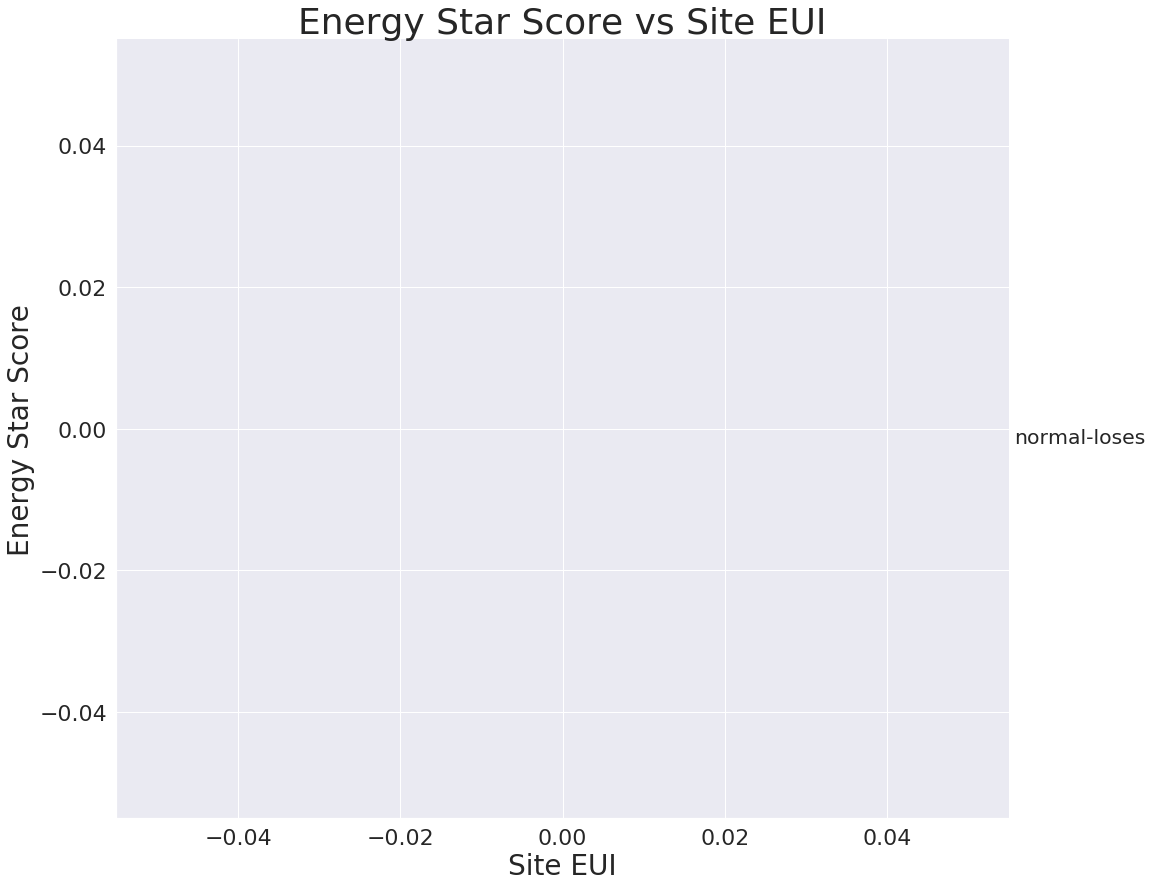

In [26]:
figsize(10, 20)

# Extract the building types
features['normal-loses'] = df.dropna(subset = ['symboling'])['normal-loses']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['normal-loses'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('city-mpg','symboling',
          hue = 'normal-loses', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

/home/developer/pycharm_projects/YuriyLyashenko_MA2018Python/Homework13/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/home/developer/pycharm_projects/YuriyLyashenko_MA2018Python/Homework13/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/developer/pycharm_projects/YuriyLyashenko_MA2018Python/Homework13/venv/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/developer/pycharm_projects/YuriyLyashenko_MA2018Python/Homework13/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/developer/pycharm_projects/YuriyLyashenko_MA2018Python/Homework13/venv/lib/python3.6/site-

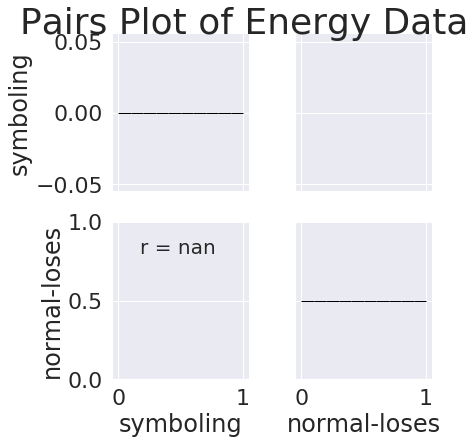

In [33]:
# Extract the columns to  plot
plot_data = features[['symboling', 'normal-loses']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'symboling': 'symboling', 
                                        'normal-loses': 'normal-loses',
                                        'make': 'make'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);
